In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
path = r'C:\Users\user\Downloads\Student_Marks.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
data.shape

(100, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


# Cheking for NULL

In [6]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

# Value count

In [7]:
data['number_courses'].value_counts()

3    22
4    21
6    16
8    16
7    15
5    10
Name: number_courses, dtype: int64

# Data visualization

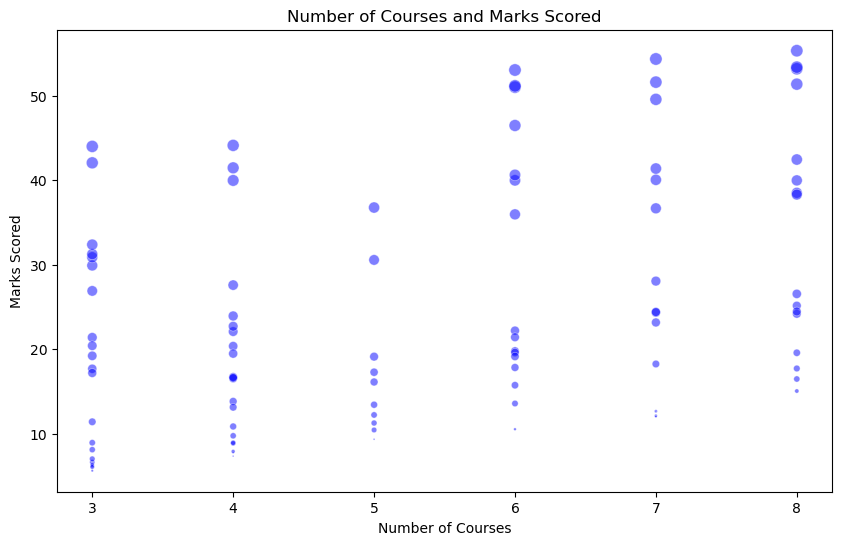

In [8]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['number_courses'], data['Marks'], s=data['time_study']*10, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)

# Customize the plot
plt.title("Number of Courses and Marks Scored")
plt.xlabel("Number of Courses")
plt.ylabel("Marks Scored")
plt.show()

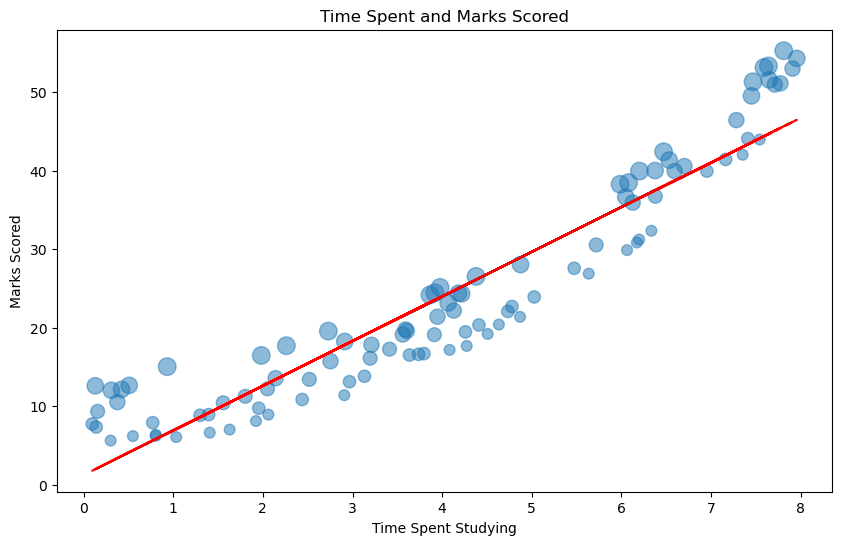

In [9]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['time_study'], data['Marks'], s=data['number_courses']*20, alpha=0.5)

# Fit a linear trendline
z = np.polyfit(data['time_study'], data['Marks'], 1)
p = np.poly1d(z)
plt.plot(data['time_study'], p(data['time_study']), "r--")

# Customize the plot
plt.title("Time Spent and Marks Scored")
plt.xlabel("Time Spent Studying")
plt.ylabel("Marks Scored")
plt.show()


# Calculate correlation matrix

In [10]:
correlation = data.corr()
correlation["Marks"].sort_values(ascending=False)

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64

# Separating dataset into input features and the target variable

In [11]:
X = data[['number_courses', 'time_study']]
y = data['Marks']

# Train-test split


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

# Model prediction


In [14]:
y_pred = model.predict(X_test)

# Model evaluation using metrics


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 14.200726136374538
R^2 Score: 0.9459936100591214


# Visualization of the Result


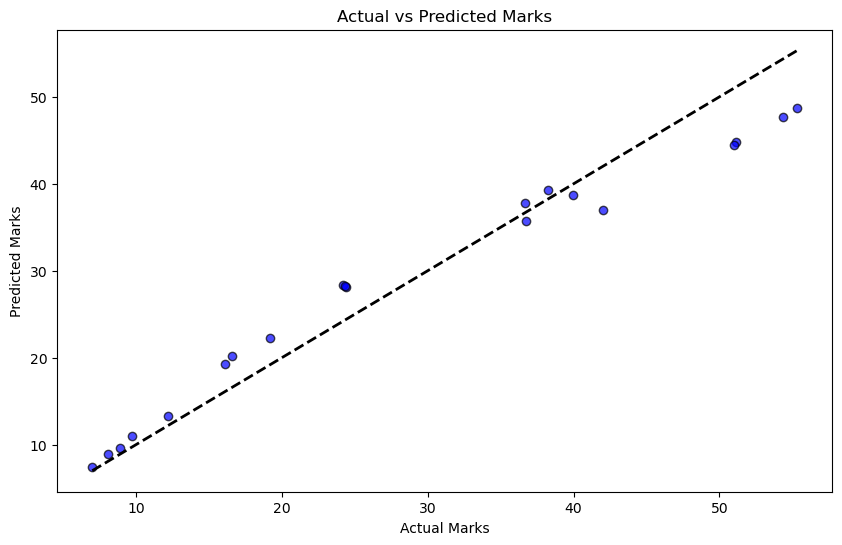

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Marks')
plt.show()